In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data from csv 
trial1_results = pd.read_csv('SVR_WithTime_Offset_3_Trial_1.csv', header=0)
trial2_results = pd.read_csv('SVR_WithTime_Offset_3_Trial_2.csv', header=0)
trial3_results = pd.read_csv('SVR_WithTime_Offset_3_Trial_3.csv', header=0)

In [3]:
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,1.0,9.7381,900.0
2,3.0,1.0,8.8565,1800.0
3,4.0,1.0,8.0982,2700.0
4,5.0,1.0,7.2167,3600.0
...,...,...,...,...
3001,3002.0,1.0,6.3767,768900.0
3002,3003.0,2.0,5.3408,769700.0
3003,3004.0,6.0,5.3408,769200.0
3004,3005.0,6.0,5.3408,768700.0


In [4]:
trial2_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,1.0,9.7381,900.0
2,3.0,1.0,8.8565,1800.0
3,4.0,2.0,7.3198,2600.0
4,5.0,2.0,8.2020,3400.0
...,...,...,...,...
3001,3002.0,4.0,0.5160,702800.0
3002,3003.0,4.0,0.5160,702300.0
3003,3004.0,4.0,0.5160,701800.0
3004,3005.0,0.0,5.8373,702800.0


In [5]:
trial3_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,0.0,9.6658,1000.0
2,3.0,1.0,8.8896,1900.0
3,4.0,2.0,7.3198,2700.0
4,5.0,3.0,4.5642,3200.0
...,...,...,...,...
3001,3002.0,2.0,5.8352,733400.0
3002,3003.0,2.0,5.3258,734200.0
3003,3004.0,6.0,5.3258,733700.0
3004,3005.0,1.0,7.0808,734600.0


## Analyse per timestep rewards

In [6]:
timeStop = 3000

In [7]:
trial1_rewards = trial1_results['Cummulative Reward'].tolist()
trial1_rewards = trial1_rewards[:timeStop]

In [8]:
trial2_rewards = trial2_results['Cummulative Reward'].tolist()
trial2_rewards = trial2_rewards[:timeStop]

In [9]:
trial3_rewards = trial3_results['Cummulative Reward'].tolist()
trial3_rewards = trial3_rewards[:timeStop]

In [10]:
data = {'Trial 1': trial1_rewards, 'Trial 2': trial2_rewards, 'Trial 3': trial3_rewards}
rewards_DF = pd.DataFrame(data=data)
rewards_DF

,Trial 1,Trial 2,Trial 3
0,0.0,0.0,0.0
1,900.0,900.0,1000.0
2,1800.0,1800.0,1900.0
3,2700.0,2600.0,2700.0
4,3600.0,3400.0,3200.0
...,...,...,...
2995,764500.0,702800.0,732400.0
2996,764000.0,703800.0,731900.0
2997,765000.0,704800.0,731400.0
2998,766000.0,704300.0,730900.0


In [11]:
rewards_DF['mean'] = rewards_DF.mean(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean
0,0.0,0.0,0.0,0.000000
1,900.0,900.0,1000.0,933.333333
2,1800.0,1800.0,1900.0,1833.333333
3,2700.0,2600.0,2700.0,2666.666667
4,3600.0,3400.0,3200.0,3400.000000
...,...,...,...,...
2995,764500.0,702800.0,732400.0,733233.333333
2996,764000.0,703800.0,731900.0,733233.333333
2997,765000.0,704800.0,731400.0,733733.333333
2998,766000.0,704300.0,730900.0,733733.333333


In [12]:
rewards_DF['Standard Deviation'] = rewards_DF[['Trial 1','Trial 2', 'Trial 3']].std(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean,Standard Deviation
0,0.0,0.0,0.0,0.000000,0.000000
1,900.0,900.0,1000.0,933.333333,57.735027
2,1800.0,1800.0,1900.0,1833.333333,57.735027
3,2700.0,2600.0,2700.0,2666.666667,57.735027
4,3600.0,3400.0,3200.0,3400.000000,200.000000
...,...,...,...,...,...
2995,764500.0,702800.0,732400.0,733233.333333,30858.440228
2996,764000.0,703800.0,731900.0,733233.333333,30122.140252
2997,765000.0,704800.0,731400.0,733733.333333,30167.753203
2998,766000.0,704300.0,730900.0,733733.333333,30947.428542


In [13]:
rewards_upper = []
rewards_lower = []
for index, row in rewards_DF.iterrows():
    meanReward = row['mean']
    stdev = row['Standard Deviation']
    maxReward = meanReward + stdev
    rewards_upper.append(maxReward)
    minReward = meanReward - stdev
    rewards_lower.append(minReward)

In [14]:
rewards_mean = rewards_DF['mean'].tolist()
rewards_mean

[0.0,
 933.3333333333334,
 1833.3333333333333,
 2666.6666666666665,
 3400.0,
 3800.0,
 4500.0,
 4333.333333333333,
 4166.666666666667,
 4433.333333333333,
 4700.0,
 5100.0,
 5466.666666666667,
 6166.666666666667,
 6533.333333333333,
 6900.0,
 7166.666666666667,
 7100.0,
 7033.333333333333,
 6966.666666666667,
 6800.0,
 7066.666666666667,
 6633.333333333333,
 6100.0,
 4400.0,
 4033.3333333333335,
 3200.0,
 2366.6666666666665,
 1500.0,
 1133.3333333333333,
 2100.0,
 3033.3333333333335,
 3000.0,
 3933.3333333333335,
 4866.666666666667,
 5766.666666666667,
 6633.333333333333,
 6566.666666666667,
 6533.333333333333,
 7000.0,
 7900.0,
 8333.333333333334,
 9266.666666666666,
 9733.333333333334,
 10133.333333333334,
 10100.0,
 10066.666666666666,
 11000.0,
 11433.333333333334,
 11866.666666666666,
 11800.0,
 11633.333333333334,
 11466.666666666666,
 11300.0,
 11633.333333333334,
 11966.666666666666,
 12266.666666666666,
 12066.666666666666,
 12500.0,
 13000.0,
 13500.0,
 14433.333333333334,
 1

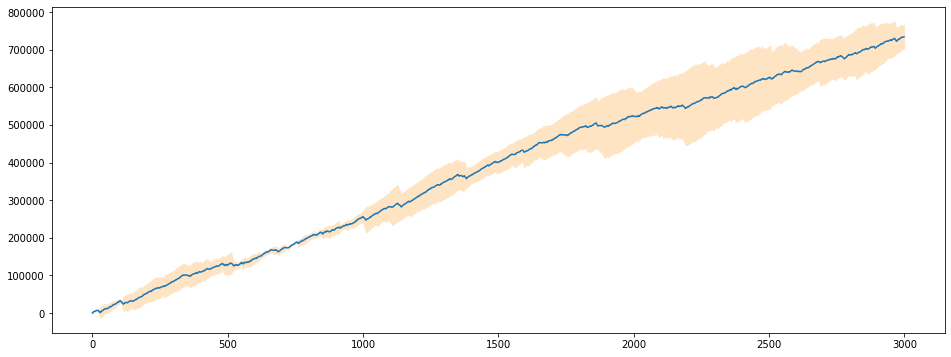

In [15]:
#plot graph 
x = [i for i in range(timeStop)]
plt.figure(figsize=(16, 6))
plt.plot(x, rewards_mean)
plt.fill_between(x, rewards_upper, rewards_lower, color='bisque')
plt.show()

## Analyse number of failure and maintenance instances

In [16]:
trial1_states = trial1_results['State'].tolist()
trial1_states = trial1_states[:3000]
trial1_states

[0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 6.0,
 6.0,
 6.0,
 6.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 7.0,
 7.0,
 2.0,
 3.0,
 3.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 0.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 1.0,
 1.0,
 1.0,
 5.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 0.0,
 4.0,
 4.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 5.0,
 5.0,
 0.0,
 0.0,
 0.0,
 1.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 5.0,
 5.0,
 0.0,
 0.0,
 0.0,
 1.0,
 5.0,
 0.0,
 0.0,
 4.0,
 0.0,
 1.0,
 1.0,
 5.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 0.0,
 0.0,
 1.0,
 5.0,
 0.0,
 4.0,
 4.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 5.0,
 0.0,
 0.0,
 1.0,
 1.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 0.0,
 0.0,
 4.0,
 4.0,
 0.0,
 0.0,
 1.0,
 1.0,
 5.0,
 0.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 1.0,
 1.0,
 5.0,
 5.0,
 5.0,
 0.0,
 0.0,
 1.0

In [17]:
def findNumEpisodes(stateList):
    previousState = stateList[0]
    currentState = stateList[0]
    endIndexes = []
    for order in range(len(stateList)):
        currentState = stateList[order]
        
        #check for failure
        if (currentState == 0) and (previousState > 7):
            endIndexes.append(order - 1)
            
        previousState = stateList[order]
    return len(endIndexes)

In [18]:
trial1_numEpisodes = findNumEpisodes(trial1_states)
trial1_numEpisodes

47

In [19]:
def findIndexesOfState(state, dataDF):
    stateIndexes = []
    for index, row in dataDF.iterrows():
        currentState = row['State']
        if currentState == state:
            timestep = row['Timestep']
            stateIndexes.append(timestep)
    return stateIndexes

In [20]:
trial1_results = trial1_results[:3000]
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,1.0,9.7381,900.0
2,3.0,1.0,8.8565,1800.0
3,4.0,1.0,8.0982,2700.0
4,5.0,1.0,7.2167,3600.0
...,...,...,...,...
2995,2996.0,4.0,5.3179,764500.0
2996,2997.0,4.0,5.3179,764000.0
2997,2998.0,0.0,6.6730,765000.0
2998,2999.0,0.0,7.2161,766000.0


In [21]:
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_indexes

[23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 483.0,
 484.0,
 485.0,
 486.0,
 487.0,
 488.0,
 489.0,
 848.0,
 849.0,
 850.0,
 851.0,
 862.0,
 863.0,
 1353.0,
 1354.0,
 1355.0,
 1376.0,
 1377.0,
 1378.0,
 1379.0,
 1380.0,
 1381.0,
 1382.0,
 1383.0,
 1452.0,
 1680.0,
 1681.0,
 1864.0,
 1865.0,
 1866.0,
 1867.0,
 1868.0,
 1906.0,
 1973.0,
 2281.0,
 2505.0,
 2506.0,
 2507.0,
 2508.0,
 2509.0,
 2510.0,
 2511.0,
 2731.0,
 2737.0,
 2747.0,
 2889.0,
 2890.0,
 2891.0,
 2892.0,
 2893.0,
 2894.0,
 2966.0,
 2967.0,
 2968.0,
 2969.0,
 2970.0,
 2971.0,
 2972.0]

In [22]:
def findNumInstancesInState(stateIndexes):
    previousIndex = stateIndexes[0]
    stateCount = 0
    for i in stateIndexes:
        if i - previousIndex > 1:
            stateCount += 1
        previousIndex = i
    return stateCount

In [23]:
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
trial1_state8_instanceCount

17

In [24]:
#state 8

#trial1
trial1_results = trial1_results[:3000]
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial1_state8_instanceCount)

#trial2
trial2_results = trial2_results[:3000]
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_instanceCount = findNumInstancesInState(trial2_state8_indexes)
print("Number of instances in trial2 in state 8: %d" % trial2_state8_instanceCount)

#trial3
trial3_results = trial3_results[:3000]
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_instanceCount = findNumInstancesInState(trial3_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial3_state8_instanceCount)

average_state8_instanceCount = (trial1_state8_instanceCount + trial2_state8_instanceCount + trial3_state8_instanceCount)/3
print(f"Average number of instances in state 8: {average_state8_instanceCount}")

Number of instances in trial1 in state 8: 17
Number of instances in trial2 in state 8: 26
Number of instances in trial1 in state 8: 24
Average number of instances in state 8: 22.333333333333332


In [25]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_instanceCount = findNumInstancesInState(trial1_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial1_state9_instanceCount)

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_instanceCount = findNumInstancesInState(trial2_state9_indexes)
print("Number of instances in trial2 in state 9: %d" % trial2_state9_instanceCount)

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_instanceCount = findNumInstancesInState(trial3_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial3_state9_instanceCount)

average_state9_instanceCount = (trial1_state9_instanceCount + trial2_state9_instanceCount + trial3_state9_instanceCount)/3
print(f"Average number of instances in state 9: {average_state9_instanceCount}")

Number of instances in trial1 in state 9: 28
Number of instances in trial2 in state 9: 32
Number of instances in trial1 in state 9: 21
Average number of instances in state 9: 27.0


## Analyse percentage of time in each state

In [26]:
#state 0

#trial1
trial1_state0_indexes = findIndexesOfState(0, trial1_results)
trial1_state0_count = len(trial1_state0_indexes)
trial1_state0_percentage = trial1_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (0, trial1_state0_count, trial1_state0_percentage))

#trial2
trial2_state0_indexes = findIndexesOfState(0, trial2_results)
trial2_state0_count = len(trial2_state0_indexes)
trial2_state0_percentage = trial2_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (0, trial2_state0_count, trial2_state0_percentage))

#trial3
trial3_state0_indexes = findIndexesOfState(0, trial3_results)
trial3_state0_count = len(trial3_state0_indexes)
trial3_state0_percentage = trial3_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (0, trial3_state0_count, trial3_state0_percentage))

#average 
average_state0_count = (trial1_state0_count + trial2_state0_count + trial3_state0_count)/3
average_state0_percentage = average_state0_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (0, average_state0_count, average_state0_percentage))

Machine is in state 0 for 536 timesteps 0.1787 percentage of time in trial 1
Machine is in state 0 for 497 timesteps 0.1657 percentage of time in trial 2
Machine is in state 0 for 592 timesteps 0.1973 percentage of time in trial 3
Machine is in state 0 for 541.6667 timesteps 0.1806 percentage of time on average


In [27]:
#state 1

#trial1
trial1_state1_indexes = findIndexesOfState(1, trial1_results)
trial1_state1_count = len(trial1_state1_indexes)
trial1_state1_percentage = trial1_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (1, trial1_state1_count, trial1_state1_percentage))

#trial2
trial2_state1_indexes = findIndexesOfState(1, trial2_results)
trial2_state1_count = len(trial2_state1_indexes)
trial2_state1_percentage = trial2_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (1, trial2_state1_count, trial2_state1_percentage))

#trial3
trial3_state1_indexes = findIndexesOfState(1, trial3_results)
trial3_state1_count = len(trial3_state1_indexes)
trial3_state1_percentage = trial3_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (1, trial3_state1_count, trial3_state1_percentage))

#average 
average_state1_count = (trial1_state1_count + trial2_state1_count + trial3_state1_count)/3
average_state1_percentage = average_state1_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (1, average_state1_count, average_state1_percentage))

Machine is in state 1 for 671 timesteps 0.2237 percentage of time in trial 1
Machine is in state 1 for 655 timesteps 0.2183 percentage of time in trial 2
Machine is in state 1 for 634 timesteps 0.2113 percentage of time in trial 3
Machine is in state 1 for 653.3333 timesteps 0.2178 percentage of time on average


In [28]:
#state 2

#trial1
trial1_state2_indexes = findIndexesOfState(2, trial1_results)
trial1_state2_count = len(trial1_state2_indexes)
trial1_state2_percentage = trial1_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (2, trial1_state2_count, trial1_state2_percentage))

#trial2
trial2_state2_indexes = findIndexesOfState(2, trial2_results)
trial2_state2_count = len(trial2_state2_indexes)
trial2_state2_percentage = trial2_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (2, trial2_state2_count, trial2_state2_percentage))

#trial3
trial3_state2_indexes = findIndexesOfState(2, trial3_results)
trial3_state2_count = len(trial3_state2_indexes)
trial3_state2_percentage = trial3_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (2, trial3_state2_count, trial3_state2_percentage))

#average 
average_state2_count = (trial1_state2_count + trial2_state2_count + trial3_state2_count)/3
average_state2_percentage = average_state2_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (2, average_state2_count, average_state2_percentage))

Machine is in state 2 for 512 timesteps 0.1707 percentage of time in trial 1
Machine is in state 2 for 581 timesteps 0.1937 percentage of time in trial 2
Machine is in state 2 for 479 timesteps 0.1597 percentage of time in trial 3
Machine is in state 2 for 524.0000 timesteps 0.1747 percentage of time on average


In [29]:
#state 3

#trial1
trial1_state3_indexes = findIndexesOfState(3, trial1_results)
trial1_state3_count = len(trial1_state3_indexes)
trial1_state3_percentage = trial1_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (3, trial1_state3_count, trial1_state3_percentage))

#trial2
trial2_state3_indexes = findIndexesOfState(3, trial2_results)
trial2_state3_count = len(trial2_state3_indexes)
trial2_state3_percentage = trial2_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (3, trial2_state3_count, trial2_state3_percentage))

#trial3
trial3_state3_indexes = findIndexesOfState(3, trial3_results)
trial3_state3_count = len(trial3_state3_indexes)
trial3_state3_percentage = trial3_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (3, trial3_state3_count, trial3_state3_percentage))

#average 
average_state3_count = (trial1_state3_count + trial2_state3_count + trial3_state3_count)/3
average_state3_percentage = average_state3_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (3, average_state3_count, average_state3_percentage))

Machine is in state 3 for 147 timesteps 0.0490 percentage of time in trial 1
Machine is in state 3 for 163 timesteps 0.0543 percentage of time in trial 2
Machine is in state 3 for 176 timesteps 0.0587 percentage of time in trial 3
Machine is in state 3 for 162.0000 timesteps 0.0540 percentage of time on average


In [30]:
#state 4

#trial1
trial1_state4_indexes = findIndexesOfState(4, trial1_results)
trial1_state4_count = len(trial1_state4_indexes)
trial1_state4_percentage = trial1_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (4, trial1_state4_count, trial1_state4_percentage))

#trial2
trial2_state4_indexes = findIndexesOfState(4, trial2_results)
trial2_state4_count = len(trial2_state4_indexes)
trial2_state4_percentage = trial2_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (4, trial2_state4_count, trial2_state4_percentage))

#trial3
trial3_state4_indexes = findIndexesOfState(4, trial3_results)
trial3_state4_count = len(trial3_state4_indexes)
trial3_state4_percentage = trial3_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (4, trial3_state4_count, trial3_state4_percentage))

#average 
average_state4_count = (trial1_state4_count + trial2_state4_count + trial3_state4_count)/3
average_state4_percentage = average_state4_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (4, average_state4_count, average_state4_percentage))

Machine is in state 4 for 124 timesteps 0.0413 percentage of time in trial 1
Machine is in state 4 for 78 timesteps 0.0260 percentage of time in trial 2
Machine is in state 4 for 144 timesteps 0.0480 percentage of time in trial 3
Machine is in state 4 for 115.3333 timesteps 0.0384 percentage of time on average


In [31]:
#state 5

#trial1
trial1_state5_indexes = findIndexesOfState(5, trial1_results)
trial1_state5_count = len(trial1_state5_indexes)
trial1_state5_percentage = trial1_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (5, trial1_state5_count, trial1_state5_percentage))

#trial2
trial2_state5_indexes = findIndexesOfState(5, trial2_results)
trial2_state5_count = len(trial2_state5_indexes)
trial2_state5_percentage = trial2_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (5, trial2_state5_count, trial2_state5_percentage))

#trial3
trial3_state5_indexes = findIndexesOfState(5, trial3_results)
trial3_state5_count = len(trial3_state5_indexes)
trial3_state5_percentage = trial3_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (5, trial3_state5_count, trial3_state5_percentage))

#average 
average_state5_count = (trial1_state5_count + trial2_state5_count + trial3_state5_count)/3
average_state5_percentage = average_state5_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (5, average_state5_count, average_state5_percentage))

Machine is in state 5 for 238 timesteps 0.0793 percentage of time in trial 1
Machine is in state 5 for 189 timesteps 0.0630 percentage of time in trial 2
Machine is in state 5 for 271 timesteps 0.0903 percentage of time in trial 3
Machine is in state 5 for 232.6667 timesteps 0.0776 percentage of time on average


In [32]:
#state 6

#trial1
trial1_state6_indexes = findIndexesOfState(6, trial1_results)
trial1_state6_count = len(trial1_state6_indexes)
trial1_state6_percentage = trial1_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (6, trial1_state6_count, trial1_state6_percentage))

#trial2
trial2_state6_indexes = findIndexesOfState(6, trial2_results)
trial2_state6_count = len(trial2_state6_indexes)
trial2_state6_percentage = trial2_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (6, trial2_state6_count, trial2_state6_percentage))

#trial3
trial3_state6_indexes = findIndexesOfState(6, trial3_results)
trial3_state6_count = len(trial3_state6_indexes)
trial3_state6_percentage = trial3_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (6, trial3_state6_count, trial3_state6_percentage))

#average 
average_state6_count = (trial1_state6_count + trial2_state6_count + trial3_state6_count)/3
average_state6_percentage = average_state6_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (6, average_state6_count, average_state6_percentage))

Machine is in state 6 for 301 timesteps 0.1003 percentage of time in trial 1
Machine is in state 6 for 316 timesteps 0.1053 percentage of time in trial 2
Machine is in state 6 for 214 timesteps 0.0713 percentage of time in trial 3
Machine is in state 6 for 277.0000 timesteps 0.0923 percentage of time on average


In [33]:
#state 7

#trial1
trial1_state7_indexes = findIndexesOfState(7, trial1_results)
trial1_state7_count = len(trial1_state7_indexes)
trial1_state7_percentage = trial1_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (7, trial1_state7_count, trial1_state7_percentage))

#trial2
trial2_state7_indexes = findIndexesOfState(7, trial2_results)
trial2_state7_count = len(trial2_state7_indexes)
trial2_state7_percentage = trial2_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (7, trial2_state7_count, trial2_state7_percentage))

#trial3
trial3_state7_indexes = findIndexesOfState(7, trial3_results)
trial3_state7_count = len(trial3_state7_indexes)
trial3_state7_percentage = trial3_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (7, trial3_state7_count, trial3_state7_percentage))

#average 
average_state7_count = (trial1_state7_count + trial2_state7_count + trial3_state7_count)/3
average_state7_percentage = average_state7_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (7, average_state7_count, average_state7_percentage))

Machine is in state 7 for 159 timesteps 0.0530 percentage of time in trial 1
Machine is in state 7 for 177 timesteps 0.0590 percentage of time in trial 2
Machine is in state 7 for 207 timesteps 0.0690 percentage of time in trial 3
Machine is in state 7 for 181.0000 timesteps 0.0603 percentage of time on average


In [34]:
#state 8

#trial1
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_count = len(trial1_state8_indexes)
trial1_state8_percentage = trial1_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (8, trial1_state8_count, trial1_state8_percentage))

#trial2
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_count = len(trial2_state8_indexes)
trial2_state8_percentage = trial2_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (8, trial2_state8_count, trial2_state8_percentage))

#trial3
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_count = len(trial3_state8_indexes)
trial3_state8_percentage = trial3_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (8, trial3_state8_count, trial3_state8_percentage))

#average 
average_state8_count = (trial1_state8_count + trial2_state8_count + trial3_state8_count)/3
average_state8_percentage = average_state8_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (8, average_state8_count, average_state8_percentage))

Machine is in state 8 for 66 timesteps 0.0220 percentage of time in trial 1
Machine is in state 8 for 102 timesteps 0.0340 percentage of time in trial 2
Machine is in state 8 for 100 timesteps 0.0333 percentage of time in trial 3
Machine is in state 8 for 89.3333 timesteps 0.0298 percentage of time on average


In [35]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_count = len(trial1_state9_indexes)
trial1_state9_percentage = trial1_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (9, trial1_state9_count, trial1_state9_percentage))

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_count = len(trial2_state9_indexes)
trial2_state9_percentage = trial2_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (9, trial2_state9_count, trial2_state9_percentage))

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_count = len(trial3_state9_indexes)
trial3_state9_percentage = trial3_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (9, trial3_state9_count, trial3_state9_percentage))

#average 
average_state9_count = (trial1_state9_count + trial2_state9_count + trial3_state9_count)/3
average_state9_percentage = average_state9_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (9, average_state9_count, average_state9_percentage))

Machine is in state 9 for 246 timesteps 0.0820 percentage of time in trial 1
Machine is in state 9 for 242 timesteps 0.0807 percentage of time in trial 2
Machine is in state 9 for 183 timesteps 0.0610 percentage of time in trial 3
Machine is in state 9 for 223.6667 timesteps 0.0746 percentage of time on average
